There are 15 people in the treatment group, and 16 in the control group.
After 8 weeks, 9/15 people in the treatment group felt better (i.e were treated), while 2/16 in control group were treated. 

Drug given : Botulinm for treatment group and Saline for control group

In [34]:
# Null Hypothesis : The Treatment administed to patients does nothing, and it is due to chance that 9/15 of treatment group were treated.
# Alternate hypothesis : The treatment administed to patients does something.

In [4]:
import pandas as pd

df = pd.read_csv('../data_sets/bta.csv')
df

,Group,Result
0,Control,1.0
1,Control,1.0
2,Control,0.0
3,Control,0.0
4,Control,0.0
5,Control,0.0
6,Control,0.0
7,Control,0.0
8,Control,0.0
9,Control,0.0


In [6]:
# Find how many people in control group had improvement in treatment.
import numpy as np
data = df.groupby('Group').mean()
data

,Result
Group,
Control,0.125
Treatment,0.600


In [7]:
# 60% of people in treatment group were cured, while only 12.5% in the control group were cured.

In [8]:
observed_diff = (data['Result'][1] - data['Result'][0])
observed_diff

0.475

In [12]:
random_samples = df.sample(31, replace=False)
random_samples

shuffled_res = random_samples['Result']
shuffled_res

14    0.0
18    1.0
19    1.0
7     0.0
21    1.0
22    1.0
0     1.0
12    0.0
25    0.0
4     0.0
8     0.0
9     0.0
6     0.0
20    1.0
30    0.0
16    1.0
5     0.0
1     1.0
24    1.0
3     0.0
23    1.0
2     0.0
29    0.0
15    0.0
13    0.0
11    0.0
10    0.0
26    0.0
17    1.0
27    0.0
28    0.0
Name: Result, dtype: float64

In [13]:
org_shuffled = df.assign(shuffled_res=shuffled_res.values)
org_shuffled

,Group,Result,shuffled_res
0,Control,1.0,0.0
1,Control,1.0,1.0
2,Control,0.0,1.0
3,Control,0.0,0.0
4,Control,0.0,1.0
5,Control,0.0,1.0
6,Control,0.0,1.0
7,Control,0.0,0.0
8,Control,0.0,0.0
9,Control,0.0,0.0


In [14]:
all_group_data = org_shuffled.groupby('Group').mean()
all_group_data

,Result,shuffled_res
Group,,
Control,0.125,0.437500
Treatment,0.600,0.266667


In [16]:
diff = np.abs(all_group_data['shuffled_res'][0] - all_group_data['shuffled_res'][1])
diff

0.17083333333333334

In [23]:
# Simulation for 10,000 iterations
diffs = np.zeros(10000)
for i in range(10000):
    shuffled = df.sample(31, replace=False)
    shuffled_res = shuffled['Result']
    org_shuffled = df.assign(shuffled_res=shuffled_res.values)
    all_group_means = org_shuffled.groupby('Group').mean()
    diffs[i] = np.abs(all_group_means['shuffled_res'][0] - all_group_means['shuffled_res'][1])
    
diffs

diff_df = pd.DataFrame(diffs)
diff_df

,0
0,0.216667
1,0.216667
2,0.087500
3,0.087500
4,0.170833
...,...
9995,0.216667
9996,0.170833
9997,0.216667
9998,0.345833


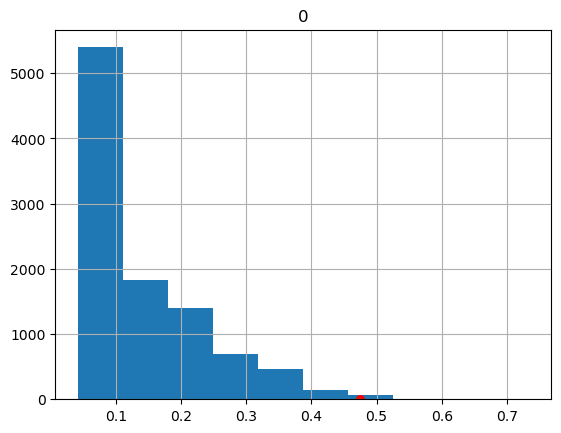

In [25]:
import matplotlib.pyplot as plt

diff_df.hist()
plt.scatter(observed_diff, 0, color='red', s=30)

In [28]:
p_value = np.count_nonzero(diffs >= observed_diff) / np.size(diffs)
p_value

0.008

In [31]:
print("Observed difference : ", observed_diff)
print("P value : ", round(p_value, 2) * 100)

Observed difference :  0.475
P value :  1.0


In [32]:
# The P Value is extremely small, and the observed statistic is at teh tail of the histogram. The result is statistically different.
# This implies we reject the null hypothesis in favour of the alternative hypothesis.